
# Answer
The best way to do it (as far as I know is using methods http://scikit-learn.org/stable/modules/ensemble.html#forest.


# Question 
in Stackoverflow [here][4].

When training the model the results depend on the sampling. In order to obtain something better you could repeat the training (in another randomly create training sample, using [Ffolds][1], [StratifiedKFold][2] ... ), somehow aggregate the results and have this way a result that will be more robust that one create in a particular case alone. **Question: is it already implemented in sklearn or similar?**. Apologies is this is a straighforward question, I haven't see a simple solution.

I see that there is a function called [cross_val_predict][3] however my first impresion having a quick look to the source code is that it predecits as many times as trains and I would like to predicts only ones, so I can piclke the, somehow aggregate results, and predict later, instead of repeat the whole training thing again.


  [1]: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
  [2]: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold
  [3]: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
  [4]: https://stackoverflow.com/q/49262367/7127519

# Objectives

* Create a training function that train the model many time and store the results.
* Create a function that collect previous trained model and provide predictions.
* I want to do it in parallel using joblib [this library is used to parallelize in Sklearn]

# Why


1. For deployment we may prefer and estimator aggregate as the second one, which provide a most consistent prediction accurracy than the first one.
2. When you parallelize the process could be interesting to be able to aggregate the results later.

You can see below a real and example.

References

1. http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
2. https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated
3. For mmap https://pythonhosted.org/joblib/parallel.html#automated-array-to-memmap-conversion



15 March 2018 Rafael Valero Fernandez

In [1]:
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

In [2]:
# Taking example with iris data

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [3]:
#iris

In [4]:
X = iris.data
y = iris.target

In [5]:
# Checking the quality of the results of one explit
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)    

0.9666666666666667

In [6]:
# Create  function to systematize the previous case.
def score_test(X,y,model = svm.SVC(kernel='linear', C=1),test_size=0.4, random_state=0):
    '''Create  function to systematize the previous case.'''
    X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test) 
score_test(X,y,model = svm.SVC(kernel='linear', C=1),test_size=0.4, random_state=None)

0.9666666666666667

(array([ 3.,  0.,  9.,  0.,  0., 28.,  0., 43.,  0., 17.]),
 array([0.93333333, 0.94      , 0.94666667, 0.95333333, 0.96      ,
        0.96666667, 0.97333333, 0.98      , 0.98666667, 0.99333333,
        1.        ]),
 <a list of 10 Patch objects>)

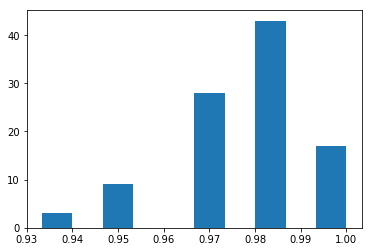

In [7]:
#Create  function to REPEAT the previous case.
def repeat_score_test( X, y,
            model = svm.SVC(kernel='linear', C=1),
            test_size=0.4, random_state=None, 
            repetitions = 5):
    '''Create  function to repeat the previous case.'''
    
    
    auxiliar_list = []
    for i in range(0,repetitions):
        score = score_test(X,y,model =model,test_size=test_size, random_state=random_state)
        auxiliar_list.append(score)
    return np.asarray(auxiliar_list)
scores_model =repeat_score_test( X, y,
            model = svm.SVC(kernel='linear', C=1),
            test_size=0.4, random_state=None, 
            repetitions = 100)
plt.hist(scores_model) 

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([0.48, 0.58, 0.68, 0.78, 0.88, 0.98, 1.08, 1.18, 1.28, 1.38, 1.48]),
 <a list of 10 Patch objects>)

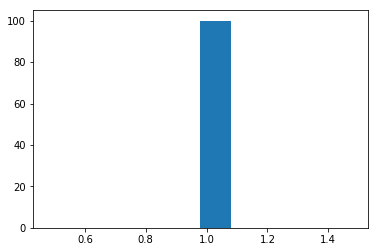

In [8]:
# Function to score cross_val_predict
from sklearn.model_selection import cross_val_predict
def cross_val_predict_score(clf, X, y, cv=5, repetitions = 5):
    auxiliar_list = []
    for i in range(0,repetitions):
        predicted = cross_val_predict(clf, X, y, cv=cv)
        score = metrics.accuracy_score(y, predicted)
        auxiliar_list.append(score)
    return np.asarray(auxiliar_list)
scores_model_with_cv = cross_val_predict_score(clf, X, y, cv=5,             repetitions = 100)
plt.hist(scores_model_with_cv) 

In [9]:
scores_model_with_cv

array([0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98])

# Key points
As you can see from previous too models there is variation is reduced a lot by using cross_val_predict.

1. For deployment we may prefer and estimator aggregate as the second one, which provide a most consistent prediction accurracy than the first one.
2. When you parallelize the process could be interesting to be able to aggregate the results later.

# Objective

* Create a training function that train the model many time and store the results.
* Create a function that collect previous trained model and provide predictions.
* I want to do it in parallel using joblib [this library is used to parallelize in Sklearn]

In [17]:
import tempfile
import shutil
import os
import numpy as np
import joblib
from joblib import Parallel, delayed
from joblib import load, dump


In [46]:
# I am going to assume a can select the number or repeated training models
repetitions = 10

In [12]:
X.shape, y.shape

((150, 4), (150,))

In [13]:
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y ,\
                test_size=0.3, random_state=0)

In [14]:
def function_to_train_model(X,y, model = svm.SVC(kernel='linear', C=1), test_size =0.3,random_state=None):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y ,\
                test_size=test_size, random_state=random_state)


    classifier_here = model
    classifier_here.fit(X_train, y_train)
    y_pred = classifier_here.predict(X)
    classifier_here.score(X_test, y_test)
    return classifier_here
function_to_train_model(X,y, model = svm.SVC(kernel='linear', C=1), test_size =0.3,random_state=None)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
def pickle_models(x, output):
    '''
    This function write the output to a file
    x: Number of model to train
    '''
    filename = "model_"+str(x)
    f = open(filename, 'wb')
    joblib.dump(output, f)  
    #f.write(str(x) + "\n" + str(20-x))
    f.close()

In [33]:
x = 10
output = function_to_train_model(X,y, model = svm.SVC(kernel='linear', C=1), test_size =0.3,random_state=None)
pickle_models(x, output)

In [20]:
# Let check the result

t
x = 10
filename = "model_"+str(x)
f = open(filename, 'rb')
print(filename)
model_here = joblib.load(f)
aux = function_to_predict_model(X,model_here = model_here)
f.close()

model_10


In [63]:
# A function that create the model and picle at the same time
def train_pickle_models(x,X,y, model = svm.SVC(kernel='linear', C=1), test_size =0.3,random_state=None):
    ''' A function that create the model and picle at the same time'''
    output = function_to_train_model(X,y, model = model, test_size =test_size,random_state=random_state)
    pickle_models(x, output)

In [64]:
train_pickle_models(x,X,y, model = svm.SVC(kernel='linear', C=1), test_size =0.3,random_state=None)

In [25]:
# Here a function to predict with the previously pickle mode..
def function_to_predict_model(X, model_here = svm.SVC(kernel='linear', C=1)):

    classifier_here = model_here
    y_pred = classifier_here.predict(X)
    return y_pred
print(aux.shape)
aux = function_to_predict_model(X,model_here = model_here)
aux

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can write and read model so know let's start thinking about parallelization


In [36]:
# Following example in https://pythonhosted.org/joblib/parallel.html#automated-array-to-memmap-conversion
#Let create a temporal folder to store the predicitons
folder = tempfile.mkdtemp()
predictions_name = os.path.join(folder, 'predictions')

In [43]:
aux.shape[0]

150

In [45]:
prediction_results[:,1]

array([6.94321298e-310, 2.31297541e-312])

In [48]:
# To prealloccate the matrices, so I can write in parallel. 
prediction_results = np.empty([repetitions,aux.shape[0]])


In [49]:
# Pre-allocate a writeable shared memory map as a container for the
# results of the parallel computation
predictions_storage = np.memmap(predictions_name, dtype=prediction_results.dtype,
                 shape=prediction_results.shape, mode='w+')

In [56]:
# This function write the results as a rewo in predictions_storage
def predict_model_to_memmap(x,predictions_storage):
    filename = "model_"+str(x)
    f = open(filename, 'rb')
    print(filename)
    model_here = joblib.load(f)
    predictions_storage[x-1,:] = function_to_predict_model(X,model_here = model_here)
    f.close()
predict_model_to_memmap(x,predictions_storage)    

model_10


In [58]:
# Checking the results
predictions_storage[9,:]

memmap([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
        2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.])

In [66]:
# TRAIN the model in parallel
Parallel(n_jobs=-1)(delayed(train_pickle_models)(x,X,y, model = svm.SVC(kernel='linear', C=1), test_size =0.3,random_state=None)
                   for x in range(repetitions))

[None, None, None, None, None, None, None, None, None, None]

In [67]:
# Parallelizing the creationg of predictions
Parallel(n_jobs=-1)(delayed(predict_model_to_memmap)(x, predictions_storage)
                   for x in range(repetitions))

model_0
model_1
model_2
model_3
model_5
model_4
model_6
model_7
model_8
model_9


[None, None, None, None, None, None, None, None, None, None]

In [69]:
# Check everything is in predictions_storage
predictions_storage.shape

(10, 150)

In [57]:
predictions_storage[9,:]

memmap([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
        2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.])

In [74]:
# BRing the data to a np array
prediction_results = predictions_storage

In [75]:
# We can delete memmap
del predictions_storage
try:
    shutil.rmtree(folder)
except:
    print("Failed to delete: " + folder)

Failed to delete: /tmp/tmplREvOF


In [ ]:
# Now I can aggregate predictions from prediction_results

In [77]:
prediction_results.shape

(10, 150)

In [80]:
prediction_aggregates = prediction_results.mean(axis =0)
prediction_aggregates

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

# Concluding
prediction_aggregates is giving me average predicted results.

